# Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features.


# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/porter.csv")

In [4]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [5]:
# prompt: shape

df.shape


(197428, 14)

In [6]:
# prompt: describe

df.describe()


,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [8]:
# prompt: null

df.isnull().sum()


market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [9]:
# Check unique values and value counts for categorical variables
print("\nUnique values and value counts for categorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique values and value counts for categorical variables:

created_at:
2015-02-11 19:50:43    6
2015-01-24 01:56:33    6
2015-02-16 01:48:11    5
2015-02-08 02:20:03    5
2015-02-11 19:51:06    5
                      ..
2015-02-16 02:42:32    1
2015-02-03 04:17:32    1
2015-02-15 01:09:16    1
2015-01-24 00:31:06    1
2015-02-01 18:18:15    1
Name: created_at, Length: 180985, dtype: int64

actual_delivery_time:
2015-02-11 20:40:45    5
2015-02-16 03:51:49    5
2015-02-12 03:14:14    5
2015-01-24 03:41:03    5
2015-02-01 03:44:13    5
                      ..
2015-02-10 02:42:43    1
2015-02-14 04:07:50    1
2015-02-15 22:06:14    1
2015-02-17 04:24:59    1
2015-02-08 20:01:41    1
Name: actual_delivery_time, Length: 178110, dtype: int64

store_id:
d43ab110ab2489d6b9b2caa394bf920f    937
757b505cfd34c64c85ca5b5690ee5293    863
faacbcd5bf1d018912c116bf2783e9a1    815
cfecdb276f634854f3ef915e2e980c31    765
45c48cce2e2d7fbdea1afc51c7c6ad26    721
                                   ... 


## Data Preprocessing

In [10]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [11]:
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

In [12]:
# prompt: drop

df = df.drop(columns=['store_id'])
df.head()


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [13]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [14]:
# Check the unique values in the categorical column
print("Unique values in 'store_primary_category' column:")
print(df['store_primary_category'].unique())


Unique values in 'store_primary_category' column:
['american' 'mexican' nan 'indian' 'italian' 'sandwich' 'thai' 'cafe'
 'salad' 'pizza' 'chinese' 'singaporean' 'burger' 'breakfast'
 'mediterranean' 'japanese' 'greek' 'catering' 'filipino'
 'convenience-store' 'other' 'korean' 'vegan' 'asian' 'barbecue' 'fast'
 'dessert' 'smoothie' 'seafood' 'vietnamese' 'cajun' 'steak'
 'middle-eastern' 'soup' 'vegetarian' 'persian' 'nepalese' 'sushi'
 'latin-american' 'hawaiian' 'chocolate' 'burmese' 'british' 'pasta'
 'alcohol' 'dim-sum' 'peruvian' 'turkish' 'malaysian' 'ethiopian' 'afghan'
 'bubble-tea' 'german' 'french' 'caribbean' 'gluten-free' 'comfort-food'
 'gastropub' 'pakistani' 'moroccan' 'spanish' 'southern' 'tapas' 'russian'
 'brazilian' 'european' 'cheese' 'african' 'argentine' 'kosher' 'irish'
 'lebanese' 'belgian' 'indonesian' 'alcohol-plus-food']


In [15]:
# Check the unique values in the categorical column
print("Unique values in 'store_primary_category' column:")
print(df['store_primary_category'].nunique())


Unique values in 'store_primary_category' column:
74


In [16]:
df.isnull().sum()


market_id                     987
created_at                      0
actual_delivery_time            7
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [17]:
# Replace missing values with 'Unknown'
df['store_primary_category'].fillna('Unknown', inplace=True)

In [18]:
# Perform one-hot
df['store_primary_category'] = df['store_primary_category'].astype('category')
df = pd.get_dummies(df, columns=['store_primary_category'], prefix='category')

In [19]:
df.head()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.isnull().sum()

market_id               987
created_at                0
actual_delivery_time      7
order_protocol          995
total_items               0
                       ... 
category_thai             0
category_turkish          0
category_vegan            0
category_vegetarian       0
category_vietnamese       0
Length: 87, dtype: int64

In [21]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime data type
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [22]:
# Create target column representing time taken for each delivery
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


In [23]:
# Extract hour of day and day of week from 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek

In [24]:
# Imputation - Replace missing values with the median of each column
df.fillna(df.median(),inplace =True)

<ipython-input-24-541c44e83cbc>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median(),inplace =True)


In [25]:
df.head()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,...,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese,delivery_time,order_hour,order_day_of_week
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,...,0,0,0,0,0,0,0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,...,0,0,0,0,0,0,0,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,...,0,0,0,0,0,0,0,29.683333,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,...,0,0,0,0,0,0,0,51.250000,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,...,0,0,0,0,0,0,0,39.833333,2,6


In [26]:
df.isnull().sum()

market_id               0
created_at              0
actual_delivery_time    7
order_protocol          0
total_items             0
                       ..
category_vegetarian     0
category_vietnamese     0
delivery_time           0
order_hour              0
order_day_of_week       0
Length: 90, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 90 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   market_id                   197428 non-null  float64       
 1   created_at                  197428 non-null  datetime64[ns]
 2   actual_delivery_time        197421 non-null  datetime64[ns]
 3   order_protocol              197428 non-null  float64       
 4   total_items                 197428 non-null  int64         
 5   subtotal                    197428 non-null  int64         
 6   num_distinct_items          197428 non-null  int64         
 7   min_item_price              197428 non-null  int64         
 8   max_item_price              197428 non-null  int64         
 9   total_onshift_partners      197428 non-null  float64       
 10  total_busy_partners         197428 non-null  float64       
 11  total_outstanding_orders    197428 non-

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

market_id               0
created_at              0
actual_delivery_time    0
order_protocol          0
total_items             0
                       ..
category_vegetarian     0
category_vietnamese     0
delivery_time           0
order_hour              0
order_day_of_week       0
Length: 90, dtype: int64

In [30]:
df.head()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,...,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese,delivery_time,order_hour,order_day_of_week
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,...,0,0,0,0,0,0,0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,...,0,0,0,0,0,0,0,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,...,0,0,0,0,0,0,0,29.683333,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,...,0,0,0,0,0,0,0,51.250000,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,...,0,0,0,0,0,0,0,39.833333,2,6


## Data visualization and cleaning

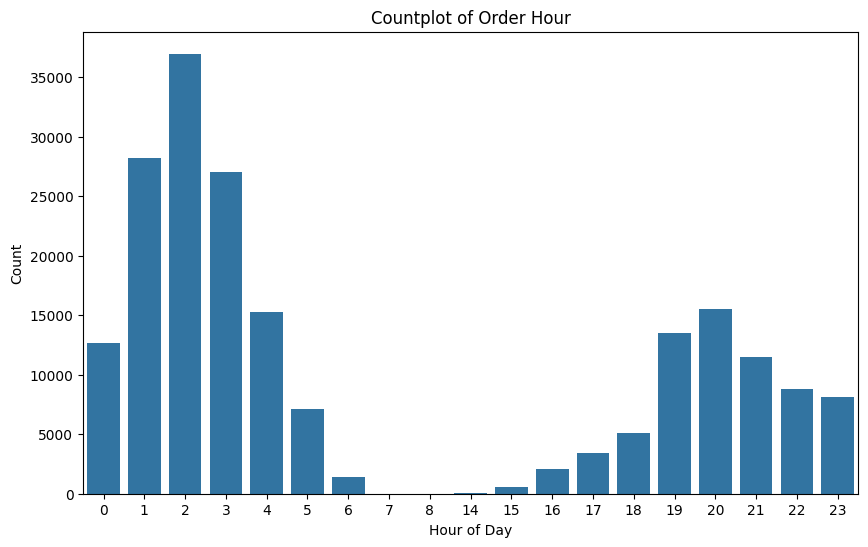

In [31]:
# Countplot for 'order_hour' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='order_hour')
plt.title('Countplot of Order Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

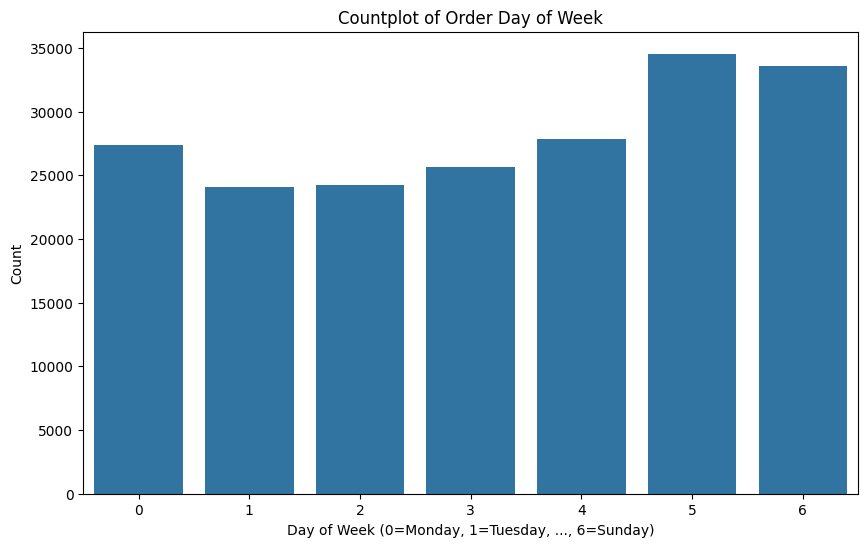

In [32]:
# Countplot for 'order_day_of_week' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='order_day_of_week')
plt.title('Countplot of Order Day of Week')
plt.xlabel('Day of Week (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Count')
plt.show()

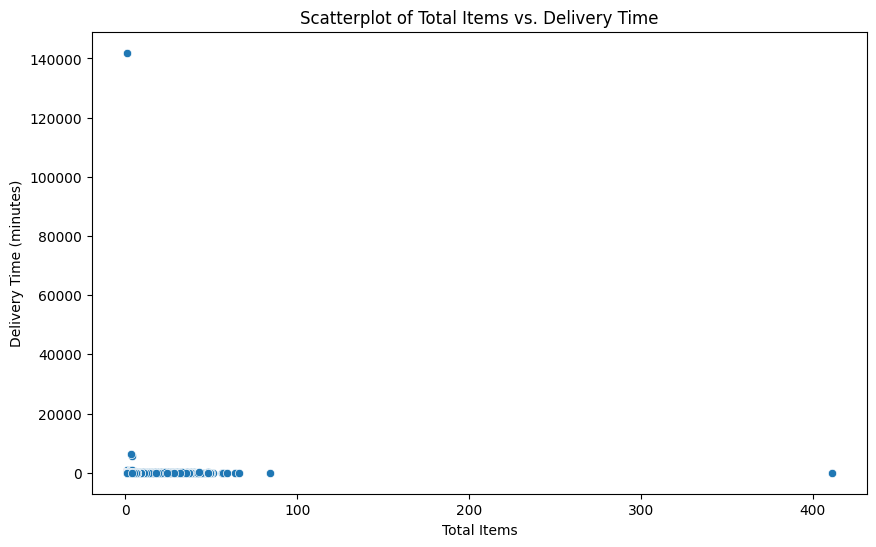

In [33]:
# Scatterplot between 'total_items' and 'delivery_time' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_items', y='delivery_time')
plt.title('Scatterplot of Total Items vs. Delivery Time')
plt.xlabel('Total Items')
plt.ylabel('Delivery Time (minutes)')
plt.show()


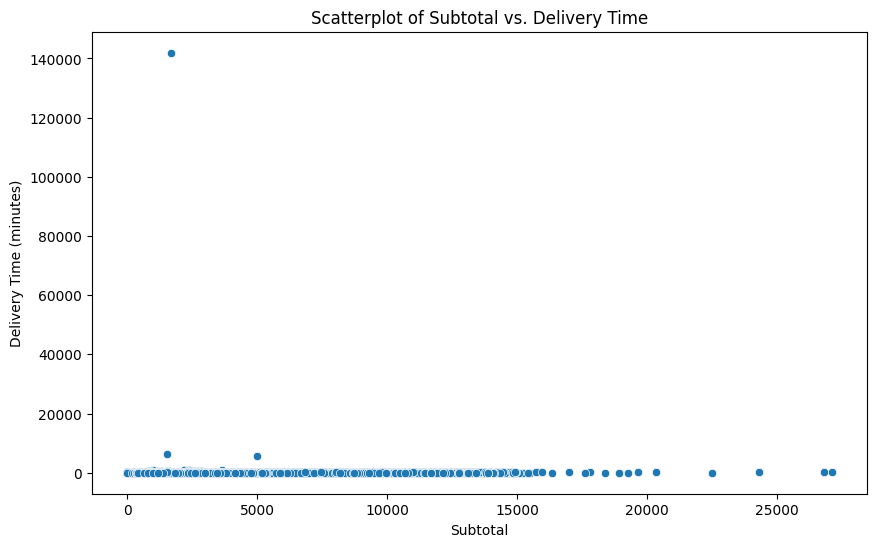

In [34]:
# Scatterplot between 'subtotal' and 'delivery_time' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='subtotal', y='delivery_time')
plt.title('Scatterplot of Subtotal vs. Delivery Time')
plt.xlabel('Subtotal')
plt.ylabel('Delivery Time (minutes)')
plt.show()

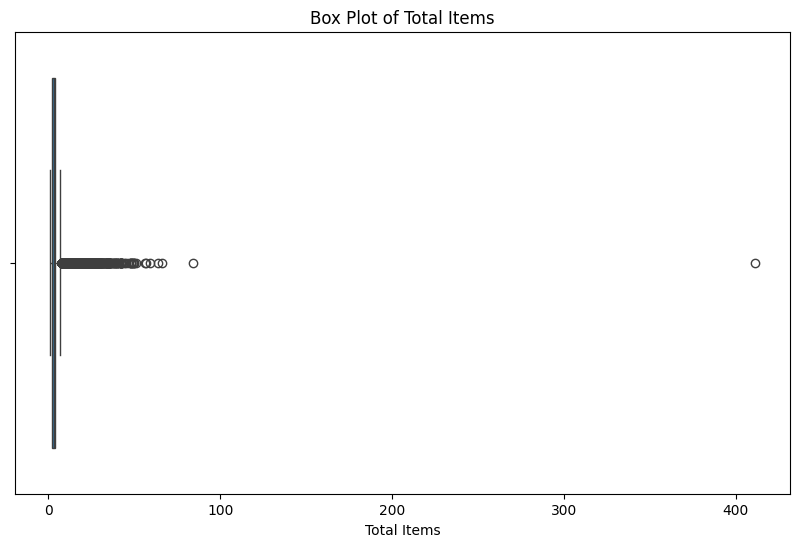

In [35]:
# Box plot for 'total_items' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='total_items')
plt.title('Box Plot of Total Items')
plt.xlabel('Total Items')
plt.show()

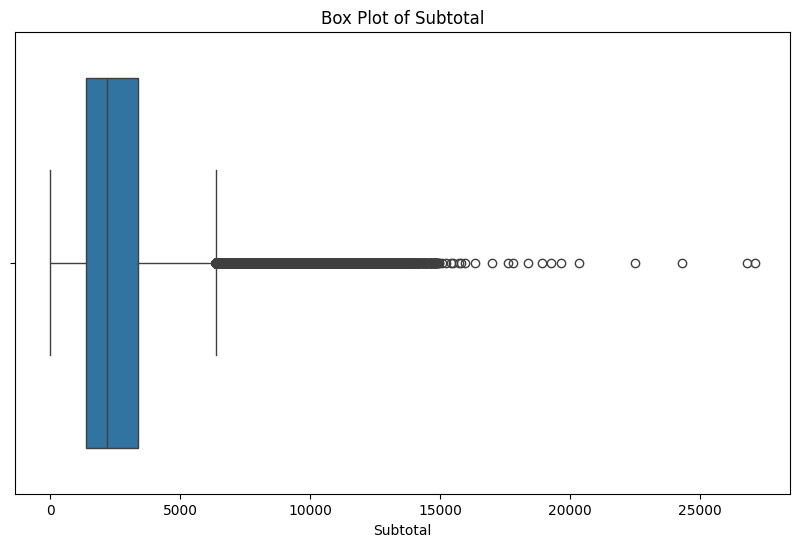

In [36]:
# Box plot for 'subtotal' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subtotal')
plt.title('Box Plot of Subtotal')
plt.xlabel('Subtotal')
plt.show()


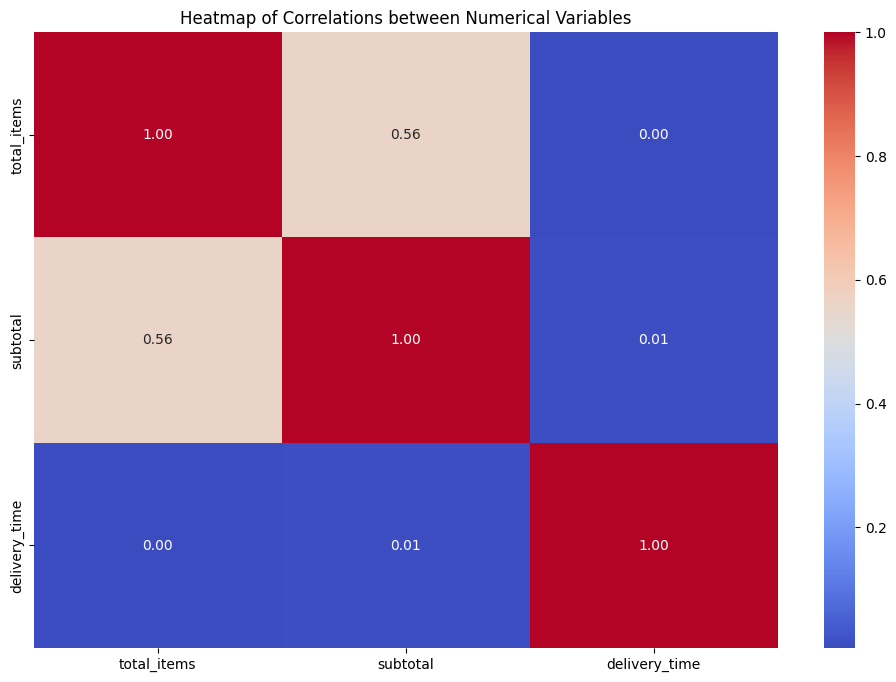

In [37]:
# Heatmap of correlations between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[['total_items', 'subtotal', 'delivery_time']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations between Numerical Variables')
plt.show()

In [38]:
# Check for outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


In [39]:
# Check for outliers in 'total_items' and 'subtotal' columns
outliers_total_items = detect_outliers_iqr(df, 'total_items')
outliers_subtotal = detect_outliers_iqr(df, 'subtotal')


In [40]:
# Remove outliers
df_cleaned = df[~df.index.isin(outliers_total_items.index) & ~df.index.isin(outliers_subtotal.index)]


Text(0.5, 0, 'Total Items')

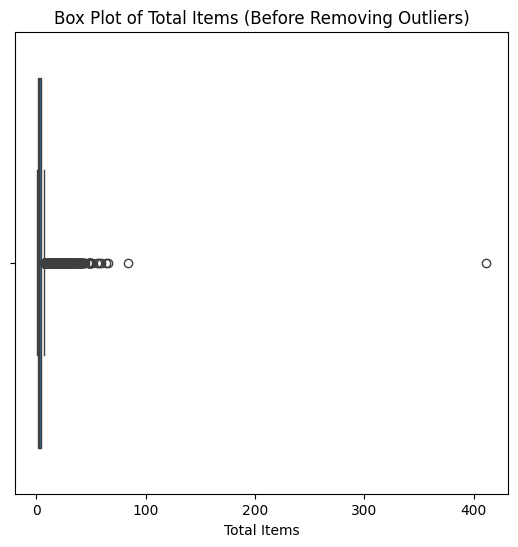

In [41]:
# Box plot for 'total_items' column before and after removing outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='total_items')
plt.title('Box Plot of Total Items (Before Removing Outliers)')
plt.xlabel('Total Items')

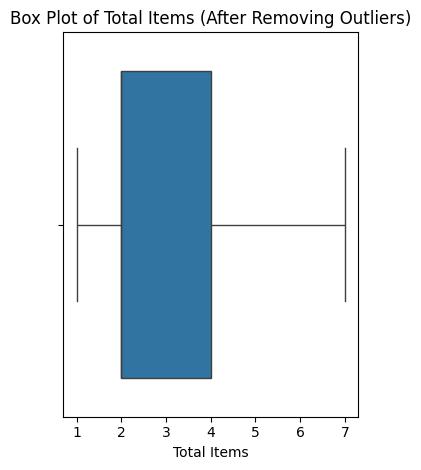

In [42]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='total_items')
plt.title('Box Plot of Total Items (After Removing Outliers)')
plt.xlabel('Total Items')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Subtotal')

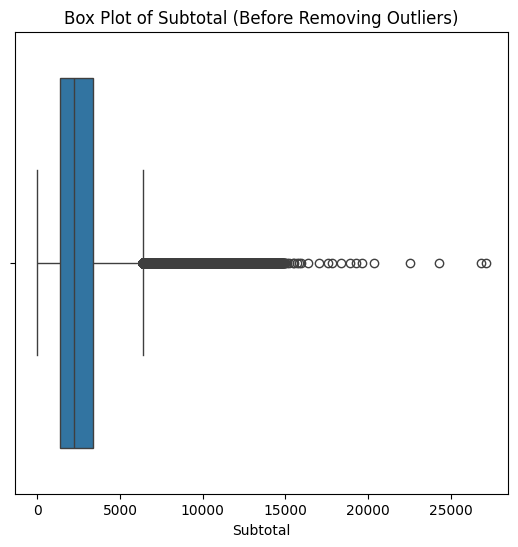

In [43]:
# Box plot for 'subtotal' column before and after removing outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='subtotal')
plt.title('Box Plot of Subtotal (Before Removing Outliers)')
plt.xlabel('Subtotal')


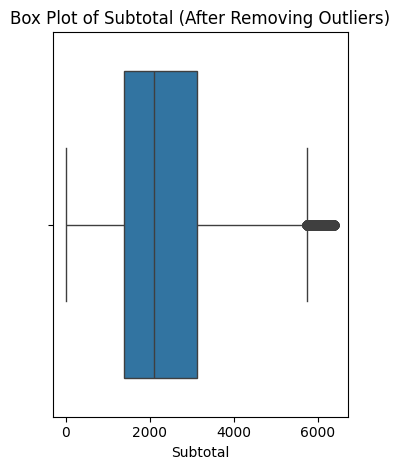

In [44]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='subtotal')
plt.title('Box Plot of Subtotal (After Removing Outliers)')
plt.xlabel('Subtotal')
plt.tight_layout()
plt.show()

## Regression with neural networks

In [45]:
df_cleaned.head()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,...,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese,delivery_time,order_hour,order_day_of_week
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,...,0,0,0,0,0,0,0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,...,0,0,0,0,0,0,0,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,...,0,0,0,0,0,0,0,29.683333,20,3
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,...,0,0,0,0,0,0,0,39.833333,2,6
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,1.0,3,5000,3,1500,1900,2.0,...,0,0,0,0,0,0,0,38.333333,20,2


In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182953 entries, 0 to 197427
Data columns (total 90 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   market_id                   182953 non-null  float64       
 1   created_at                  182953 non-null  datetime64[ns]
 2   actual_delivery_time        182953 non-null  datetime64[ns]
 3   order_protocol              182953 non-null  float64       
 4   total_items                 182953 non-null  int64         
 5   subtotal                    182953 non-null  int64         
 6   num_distinct_items          182953 non-null  int64         
 7   min_item_price              182953 non-null  int64         
 8   max_item_price              182953 non-null  int64         
 9   total_onshift_partners      182953 non-null  float64       
 10  total_busy_partners         182953 non-null  float64       
 11  total_outstanding_orders    182953 non-

In [47]:
print(df.shape ,df_cleaned.shape)

(197421, 90) (182953, 90)


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Define features (X) and target variable (y)
X = df_cleaned.drop(['delivery_time', 'created_at', 'actual_delivery_time'], axis=1)
y = df_cleaned['delivery_time']  # Target variable

In [50]:
#Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (146362, 87)
Shape of X_test: (36591, 87)
Shape of y_train: (146362,)
Shape of y_test: (36591,)


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Initialize MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit and transform MinMaxScaler on training data, and transform testing data
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

## Model Building

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Ftrl


In [67]:
# Define the neural network architecture with custom layer names
model = Sequential([
    Dense(64, activation='relu', input_shape=(87,), name='input_layer',kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu', name='hidden_layer_1'),
    Dense(16, activation='relu', name='hidden_layer_2'),
    Dense(8, activation='relu', name='hidden_layer_3'),
    Dense(4, activation='relu', name='hidden_layer_4'),
    Dense(1, name='output_layer')
])


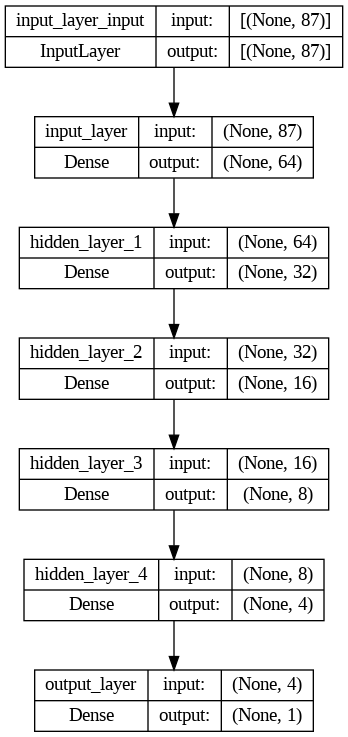

In [68]:
from tensorflow.keras.utils import plot_model

plot_model(model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)

In [69]:
# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])


In [70]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                5632      
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                2080      
                                                                 
 hidden_layer_2 (Dense)      (None, 16)                528       
                                                                 
 hidden_layer_3 (Dense)      (None, 8)                 136       
                                                                 
 hidden_layer_4 (Dense)      (None, 4)                 36        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 8,417
Trainable params: 8,417
Non-traina

In [71]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback


class VerboseCallback(tf.keras.callbacks.Callback):
  # runs only before the training starts
  def on_train_begin(self, logs=None):
        print("Starting training...")

  # runs after every epoch
  def on_epoch_end(self, epoch, logs = None):
    if (epoch) % 10 == 0:
       print(f"Epoch {epoch}: {logs}")

  # runs once training is finished
  def on_train_end(self, logs=None):
        print("...Finished training")



In [72]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=64, batch_size=512, validation_data=(X_test_scaled, y_test),callbacks=[VerboseCallback()],verbose=0)

Starting training...
Epoch 0: {'loss': 692.4131469726562, 'mean_absolute_error': 15.232264518737793, 'mean_squared_error': 690.8053588867188, 'val_loss': 551666.75, 'val_mean_absolute_error': 16.643657684326172, 'val_mean_squared_error': 551664.9375}
Epoch 10: {'loss': 510.6527099609375, 'mean_absolute_error': 11.996307373046875, 'mean_squared_error': 508.7332458496094, 'val_loss': 551657.625, 'val_mean_absolute_error': 15.760232925415039, 'val_mean_squared_error': 551655.625}
Epoch 20: {'loss': 507.59564208984375, 'mean_absolute_error': 11.918930053710938, 'mean_squared_error': 505.04315185546875, 'val_loss': 551667.125, 'val_mean_absolute_error': 15.812095642089844, 'val_mean_squared_error': 551664.4375}
Epoch 30: {'loss': 506.00555419921875, 'mean_absolute_error': 11.880911827087402, 'mean_squared_error': 503.0281066894531, 'val_loss': 551640.6875, 'val_mean_absolute_error': 16.14493751525879, 'val_mean_squared_error': 551637.6875}
Epoch 40: {'loss': 503.37591552734375, 'mean_absolu

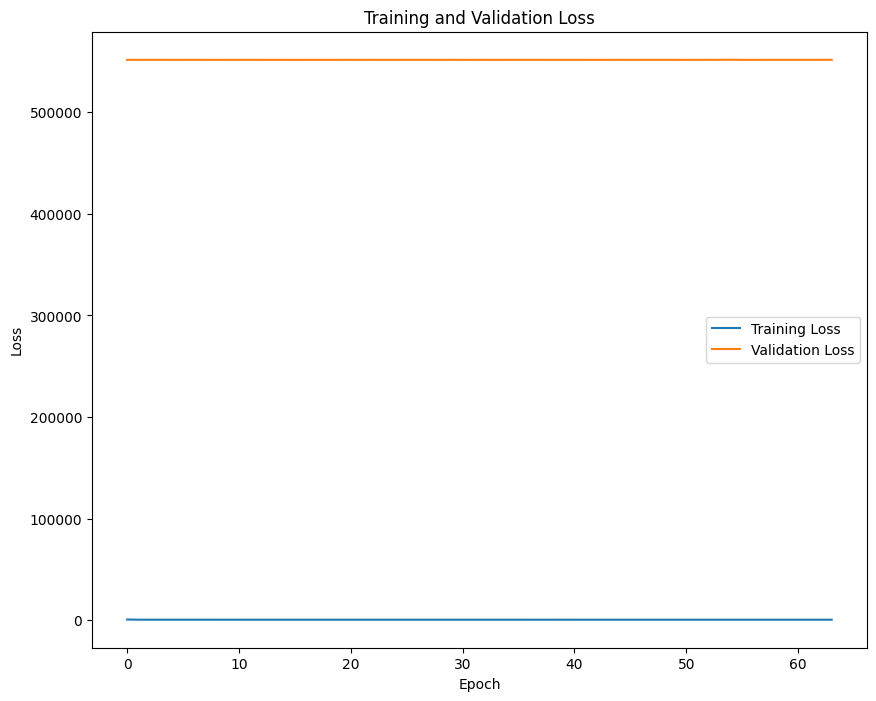

In [73]:
# Plot training and validation losses
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

1144/1144 [==============================] - 2s 2ms/step - loss: 551701.2500 - mean_absolute_error: 16.3170 - mean_squared_error: 551696.8750
Test Loss: [551701.25, 16.316970825195312, 551696.875]


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
# Predictions on test data
y_pred = model.predict(X_test_scaled)


1144/1144 [==============================] - 2s 1ms/step


In [77]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 551696.8053302772


In [78]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 742.7629536603702


In [79]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 16.316983434411227


In [80]:
y_pred

array([[44.534325],
       [50.99052 ],
       [44.45321 ],
       ...,
       [45.501602],
       [44.175518],
       [41.52071 ]], dtype=float32)